# Logistic Regression

### Importing Libraries

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing the data

In [ ]:
data = pd.read_csv('data_cleaned.csv')
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


### Segregating variables: Independent and Dependent Variables

In [ ]:
#seperating independent and dependent variables
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.shape, y.shape

((891, 24), (891,))

### Splitting the data into train set and the test set

In [ ]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

### Normalising using *min_max_scaler*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
cols = train_x.columns
cols

Index(['Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2', 'SibSp_3', 'SibSp_4',
       'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1', 'Parch_2', 'Parch_3',
       'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [ ]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.371701,0.024350,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.334004,0.016908,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.396833,0.015127,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.786378,0.152164,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.334004,0.412821,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0.396833,0.143462,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.359135,0.129995,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.367921,0.014110,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.346569,0.025374,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.371701,0.054164,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Implementing Logistic Regression

In [ ]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [ ]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Making predictions using *predict* function

In [ ]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [ ]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7514910536779325


In [ ]:
# Predicting over the Test Set and f1-score
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.736842105263158


### Making predictions using *predict_proba* function

In [ ]:
# Predicting over the Train
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.51883122, 0.48116878],
       [0.90652352, 0.09347648],
       [0.87295427, 0.12704573],
       ...,
       [0.22628745, 0.77371255],
       [0.31324228, 0.68675772],
       [0.04404181, 0.95595819]])

In [ ]:
train_preds = train_predict[:,1]
train_preds

array([0.48116878, 0.09347648, 0.12704573, 0.7775026 , 0.63082542,
       0.1166453 , 0.84467743, 0.77388896, 0.53407575, 0.08355819,
       0.10607644, 0.0854598 , 0.12417333, 0.0963503 , 0.60862522,
       0.08448092, 0.30763404, 0.12030835, 0.07164813, 0.28609299,
       0.10249259, 0.21851043, 0.07127747, 0.5892257 , 0.09031633,
       0.51354469, 0.08531457, 0.55715529, 0.6031766 , 0.12838989,
       0.82059325, 0.08549451, 0.5857625 , 0.13642119, 0.02233454,
       0.575403  , 0.21820817, 0.12576827, 0.05865561, 0.2850593 ,
       0.84149233, 0.3914617 , 0.20299632, 0.70638002, 0.48086395,
       0.94315954, 0.37021242, 0.22087473, 0.16766583, 0.89263938,
       0.1326175 , 0.63935093, 0.23863306, 0.61008109, 0.34084658,
       0.64626509, 0.77883099, 0.29238294, 0.10928979, 0.29887495,
       0.58396444, 0.29238294, 0.12459316, 0.45758658, 0.1028187 ,
       0.97634211, 0.11705265, 0.0854598 , 0.8642016 , 0.66343088,
       0.93083891, 0.74855424, 0.89839585, 0.44909463, 0.84171

In [ ]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0


In [ ]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.7366255144032922


# Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cf= confusion_matrix(test_y, test_predict)
print(cf)

[[127  17]
 [ 23  56]]


In [ ]:
from sklearn.metrics import classification_report as rep
print(rep( test_y , test_predict ))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       144
           1       0.77      0.71      0.74        79

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.82      0.82      0.82       223



# Parameters of Logistic Regression

In [ ]:
# printing the coefficients
logreg.coef_

array([[-0.03566366,  0.00287958,  1.01872099,  0.15068934, -1.08223426,
         1.18986763, -1.10269157,  0.84892093,  1.06283395,  0.35173037,
        -0.67661752, -0.78746528, -0.28571773, -0.42650866,  0.12449885,
         0.59965476, -0.18626759,  0.21157503, -0.35300024, -0.14154   ,
        -0.16774473,  0.1428133 ,  0.2349399 , -0.29057714]])

### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

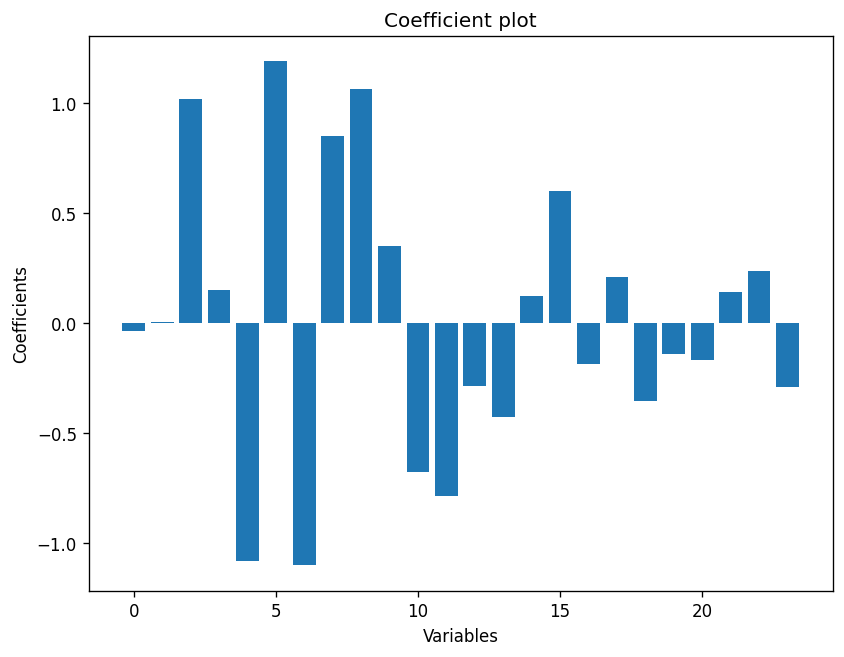

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [ ]:
Coefficients = pd.DataFrame({
    'Variable'    : train_x.columns,
    'coefficient' : abs(c)
})
Coefficients.head()

,Variable,coefficient
0,Age,0.035664
1,Fare,0.002880
2,Pclass_1,1.018721
3,Pclass_2,0.150689
4,Pclass_3,1.082234


In [ ]:
#selecting variables with high coefficient
sig_var = Coefficients[Coefficients.coefficient > 0.3]

In [ ]:
subset = data[sig_var['Variable'].values]
subset.head()

,Pclass_1,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_8,Parch_1,Parch_4
0,0,1,0,1,0,1,0,0,0,0,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,1,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,0,0,0,0


In [ ]:
# Using train test split function
train_x,test_x,train_y,test_y = train_test_split(subset, y, random_state = 56)

### Implementing Logistic Regression

In [ ]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression()

### Making predictions using *predict* function

In [ ]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.7011952191235059


Text(0.5, 1.0, 'Coefficient plot')

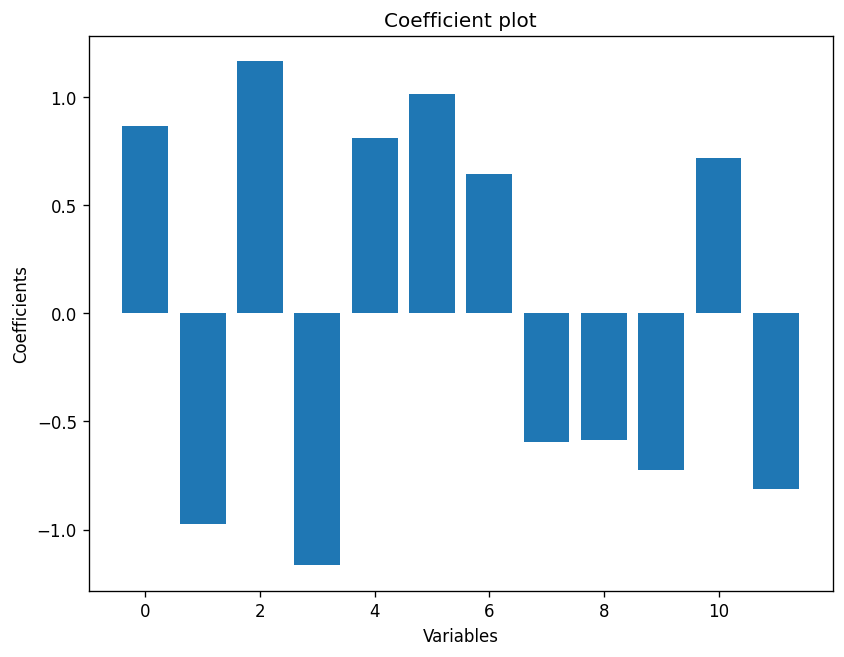

In [ ]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
c = logreg.coef_.reshape(-1)
plt.bar( x, c )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')